In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from gymnasium.wrappers.time_limit import TimeLimit

from dice_rl_TU_Vienna.value import get_get_policy_value

from dice_rl_TU_Vienna.estimators.get import get_pv_s_OnPE, get_pv_s_OffPE, get_sdc_s
from dice_rl_TU_Vienna.estimators.tabular.tabular_vafe          import TabularVafe
from dice_rl_TU_Vienna.estimators.tabular.tabular_dice          import TabularDice
from dice_rl_TU_Vienna.estimators.tabular.tabular_dual_dice     import TabularDualDice
from dice_rl_TU_Vienna.estimators.tabular.tabular_gradient_dice import TabularGradientDice

from dice_rl_TU_Vienna.utils.general import safe_zip, iterate_print
from dice_rl_TU_Vienna.utils.bedtime import computer_sleep

from plugins.boyan_chain.tabular.config import *
from plugins.boyan_chain.environment import get_env
from plugins.boyan_chain.dataset import get_dataset_by_samples, get_dataset_by_trajectories
from plugins.boyan_chain.analytical_solver import AnalyticalSolverBoyanChain

In [32]:
computer_sleep()

                                          Sleeping now...


# Prepare

In [9]:
dataset     = { seed: { N: {} for N in Ns } for seed in seeds }
id_dataset  = { seed: { N: {} for N in Ns } for seed in seeds }
dir_dataset = { seed: { N: {} for N in Ns } for seed in seeds }

for seed in iterate_print(seeds, "seed"):
    for N in iterate_print(Ns, "N"):
        for kind in iterate_print(kinds, "kind"):

            x, y = get_dataset_by_samples(seed, n_samples, N, kind)

            dataset    [seed][N][kind] = x
            id_dataset [seed][N][kind] = y
            dir_dataset[seed][N][kind] = os.path.join(dir_base, y)

seed=0
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continuing
N=512
kind=episodic
kind=continuing
N=1024
kind=episodic
kind=continuing
seed=1
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continuing
N=512
kind=episodic
kind=continuing
N=1024
kind=episodic
kind=continuing
seed=2
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continu

In [ ]:
estimators_OnPE = { seed: { N: {} for N in Ns } for seed in seeds }

for seed in iterate_print(seeds, "seed"):
    for N in iterate_print(Ns, "N"):
        for kind in iterate_print(kinds, "kind"):

            x, _ = get_dataset_by_trajectories(seed, n_trajectories, get_act_evaluation, N, kind, verbosity=0)

            x = get_get_policy_value(x)
            x.__name__ = "OnPE evaluation"

            estimators_OnPE[seed][N][kind] = x

seed=0
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continuing
N=512
kind=episodic
kind=continuing
N=1024
kind=episodic
kind=continuing
seed=1
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continuing
N=512
kind=episodic
kind=continuing
N=1024
kind=episodic
kind=continuing
seed=2
N=2
kind=episodic
kind=continuing
N=4
kind=episodic
kind=continuing
N=8
kind=episodic
kind=continuing
N=16
kind=episodic
kind=continuing
N=32
kind=episodic
kind=continuing
N=64
kind=episodic
kind=continuing
N=128
kind=episodic
kind=continuing
N=256
kind=episodic
kind=continu

In [10]:
estimators_OffPE = { seed: { N: {} for N in Ns } for seed in seeds }
estimators_VAFE  = { seed: { N: {} for N in Ns } for seed in seeds }
estimators_DICE  = { seed: { N: {} for N in Ns } for seed in seeds }

for seed in iterate_print(seeds, "seed"):
    for N in iterate_print(Ns, "N"):
        for kind in iterate_print(kinds, "kind"):
            E = [
                estimator_type(
                    dataset[seed][N][kind],
                    n_obs[N], n_act,
                    dir_dataset[seed][N][kind],
                    verbosity=1,
                )
                    for estimator_type in [
                        TabularVafe, TabularDice, TabularDualDice, TabularGradientDice, ]
            ]

            estimators_OffPE[seed][N][kind] = E
            estimators_VAFE [seed][N][kind] = E[:1]
            estimators_DICE [seed][N][kind] = E[1:]

seed=0
N=2
kind=episodic
trying to load auxiliary estimates from data/boyan_chain/2025-01-20T12:50:41.672606
loaded data/boyan_chain/2025-01-20T12:50:41.672606/d0_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/dD_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/P_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/r_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/n.npy
trying to load auxiliary estimates from data/boyan_chain/2025-01-20T12:50:41.672606
loaded data/boyan_chain/2025-01-20T12:50:41.672606/d0_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/dD_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/P_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/r_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/n.npy
trying to load auxiliary estimates from data/boyan_chain/2025-01-20T12:50:41.672606
loaded data/boyan_chain/2025-01-20T12:50:41.672606/d0_bar.npy
loaded data/boyan_chain/2025-01-20T12:50:41.672606/dD_b

# Episodic

In [11]:
kind = "episodic"

## `get_pvs` & `get_sdcs`

In [13]:
pvs_OnPE = { seed: { N: {} for N in Ns } for seed in seeds }

pvs_s_OffPE = { seed: { N: {} for N in Ns } for seed in seeds }
pvs_w_OffPE = { seed: { N: {} for N in Ns } for seed in seeds }

sdcs_DICE = { seed: { N: {} for N in Ns } for seed in seeds }

for seed in iterate_print(seeds, "seed"):
    for N in iterate_print(Ns, "N"):

        pvs_OnPE[seed][N][kind] = get_pv_s_OnPE(
            estimator_s=estimators_OnPE[seed][N][kind],
            gamma_s=gammas,
            verbosity=0,
        )

        pvs_s_OffPE[seed][N][kind] = get_pv_s_OffPE(
            estimator_s=estimators_OffPE[seed][N][kind],
            gamma_s=gammas,
            projected=projected,
            weighted=False,
            modified=modified,
            lamda=lamda,
            verbosity=0,
        )

        pvs_w_OffPE[seed][N][kind] = get_pv_s_OffPE(
            estimator_s=estimators_OffPE[seed][N][kind],
            gamma_s=gammas,
            projected=projected,
            weighted=True,
            modified=modified,
            lamda=lamda,
            verbosity=0,
        )

        sdcs_DICE[seed][N][kind] = get_sdc_s(
            estimator_s=estimators_DICE[seed][N][kind],
            gamma_s=gammas,
            projected=projected,
            modified=modified,
            lamda=lamda,
            verbosity=0,                
        )

pvs_OffPE = { False: pvs_s_OffPE, True: pvs_w_OffPE, }

seed=0
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024
seed=1
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024
seed=2
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024
seed=3
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024


In [ ]:
pvs_ANAL  = { N: { kind: [] for kind in kinds } for N in Ns }
sdcs_ANAL = { N: { kind: [] for kind in kinds } for N in Ns }

for N in iterate_print(Ns, "N"):
    analytical_solver = AnalyticalSolverBoyanChain(N, p, kind)

    for gamma in gammas:
        pv, (_, sdc), _ = analytical_solver.solve(
            gamma=gamma, projected=projected, ) # type: ignore

        pvs_ANAL [N][kind].append(pv)
        sdcs_ANAL[N][kind].append(sdc)

N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024


## Plot

In [ ]:
def plot_episodic(pv_sdc, weighted=None, errors=None):
    if pv_sdc == "pv":
        assert errors is not None
        assert weighted is not None

    for i, gamma in enumerate(gammas):

        plt.figure()

        x = Ns

        if pv_sdc == "pv":
            if errors:
                labels  = labels_approx
                colors  = colors_approx
                markers = markers_approx
            else:
                labels  = labels_approx  + labels_ANAL
                colors  = colors_approx  + colors_ANAL
                markers = markers_approx + markers_ANAL

        if pv_sdc == "sdc":
            labels  = labels_DICE
            colors  = colors_DICE
            markers = markers_DICE

        Z = labels, colors, markers
        for j, z in enumerate(safe_zip(*Z)):
            label, color, marker = z

            if pv_sdc == "pv":

                def a(seed, N):
                    if label == "OnPE evaluation":
                        return pvs_OnPE[seed][N][kind][i]
                    elif label == "analytical":
                        return pvs_ANAL[N][kind][i]
                    else:
                        return pvs_OffPE[weighted][seed][N][kind][j-1][i] # type: ignore

                b = lambda N: pvs_ANAL[N][kind][i]

                if errors:
                    ys = np.array([
                        [ np.abs( a(seed, N) - b(N) ) for N in Ns ]
                            for seed in seeds
                    ])

                else:
                    ys = np.array([
                        [ a(seed, N) for N in Ns ]
                            for seed in seeds
                    ])

            if pv_sdc == "sdc":
                a = lambda seed, N: sdcs_DICE[seed][N][kind][j][i]
                b = lambda N: sdcs_ANAL[N][kind][i]

                ys = np.array([
                    [ np.mean( ( a(seed, N) - b(N) ) ** 2 ) for N in Ns ]
                        for seed in seeds
                ])

            y_mean = np.mean(ys, axis=0)
            y_std = np.std(ys, axis=0)

            y_down = y_mean - y_std * std_girth
            y_up   = y_mean + y_std * std_girth

            l = label
            if l == "TabularDice":         l += f", {modified=}"
            if l == "TabularGradientDice": l += f", {lamda=}"

            plt.plot(x, y_mean, color=color, marker=marker, label=l)
            plt.fill_between(x, y_down, y_up, color=color, alpha=alpha)

        if pv_sdc == "pv":  do_yscale = errors
        if pv_sdc == "sdc": do_yscale = True

        plt.xscale("log")
        if do_yscale: plt.yscale("log")


        if pv_sdc == "pv":
            y = r"\hat{\rho}^\pi(\gamma)"
            z = r"\rho^\pi(\gamma)"
            if errors:
                ylabel = f"$ | {y} - {z} | $"
            else:
                ylabel = f"$ {z} $"

        if pv_sdc == "sdc":
            x = r"\mathbb{E}_D"
            y = r"\hat{w}_{\pi / D}(\gamma)"
            z = r"w_{\pi / D}(\gamma)"
            ylabel = f"$ {x} | {y} - {z} |^2 $"

        plt.xlabel("$N$")
        plt.ylabel(ylabel)

        if pv_sdc == "pv":
            if errors:
                measure = "PV Errors"
            else:
                measure = "PVs"

        if pv_sdc == "sdc":
            measure = "SDC MSEs"

        suptitle = f"Boyan Chain Tabular - {kind} - {measure}"
        plt.suptitle(suptitle)

        if pv_sdc == "pv":  title = f"gamma={gammas[i]}, {projected=}, {weighted=}"
        if pv_sdc == "sdc": title = f"gamma={gammas[i]}, {projected=}"
        plt.title(title)

        plt.grid(linestyle=":")
        plt.legend()

        file_name = f"{suptitle}; {title}.png"
        path = os.path.join(dir_images["tabular"], file_name)
        plt.savefig(path)

        plt.show()

In [ ]:
for weighted in [False, True]:
    plot_episodic("pv", weighted, errors=False)

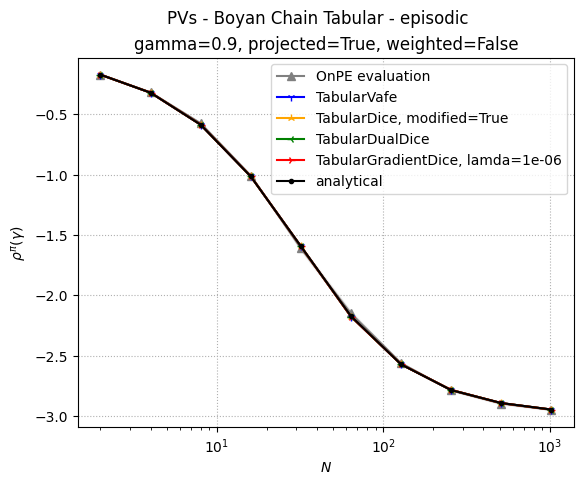

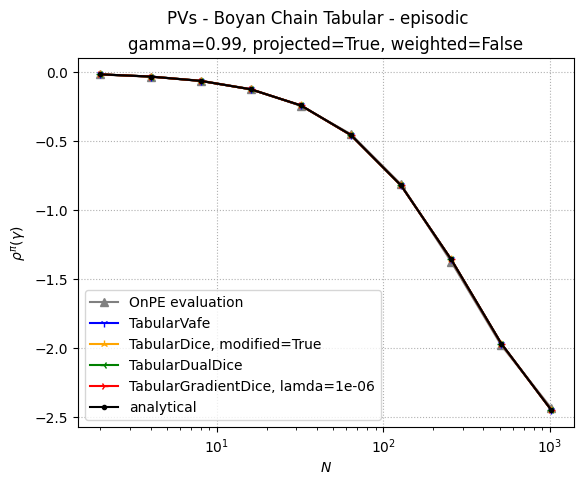

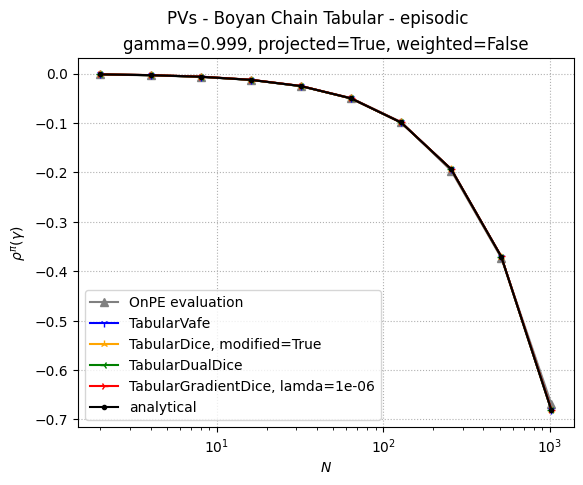

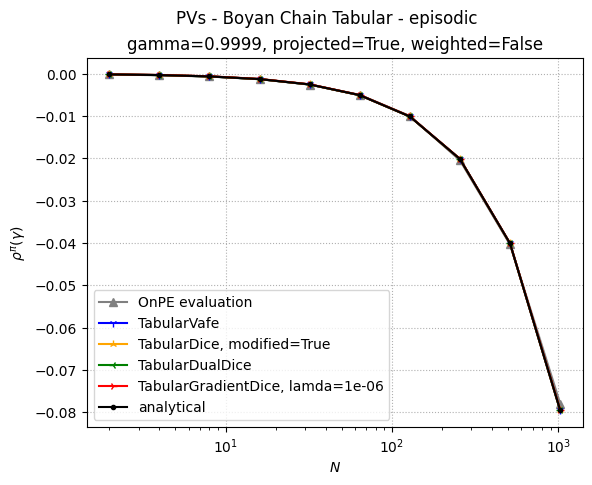

In [59]:
plot_episodic("pv", errors=False, weighted=False)

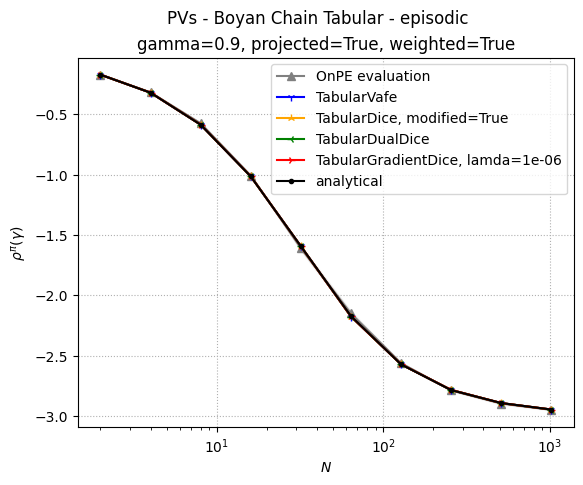

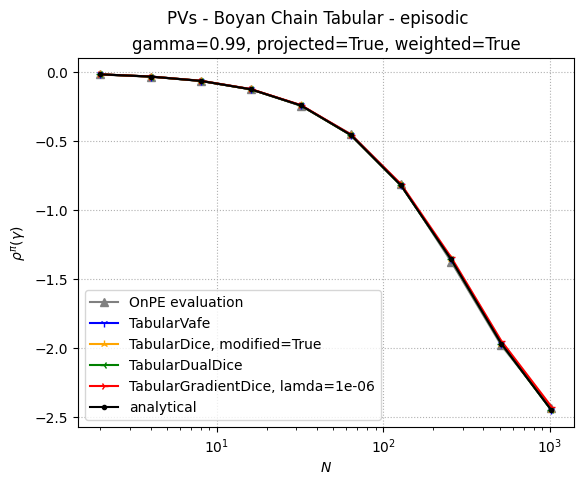

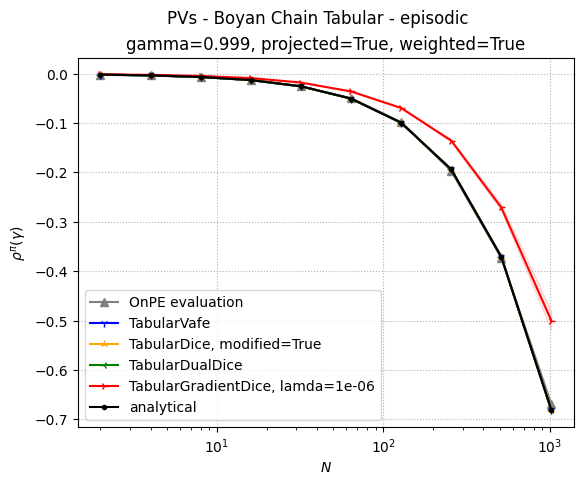

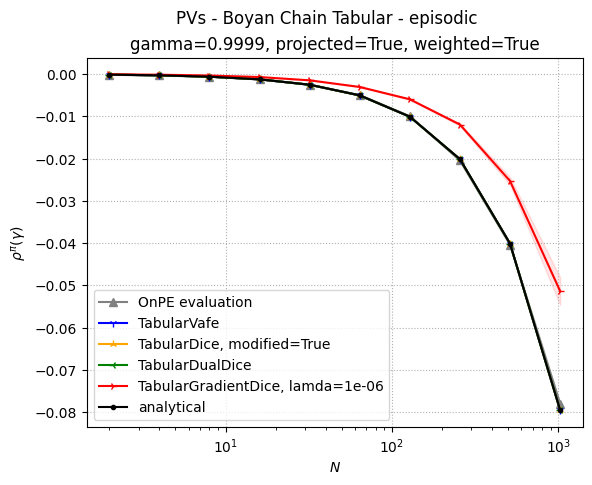

In [60]:
plot_episodic("pv", errors=False, weighted=True)

In [ ]:
for weighted in [False, True]:
    plot_episodic("pv", weighted, errors=True)

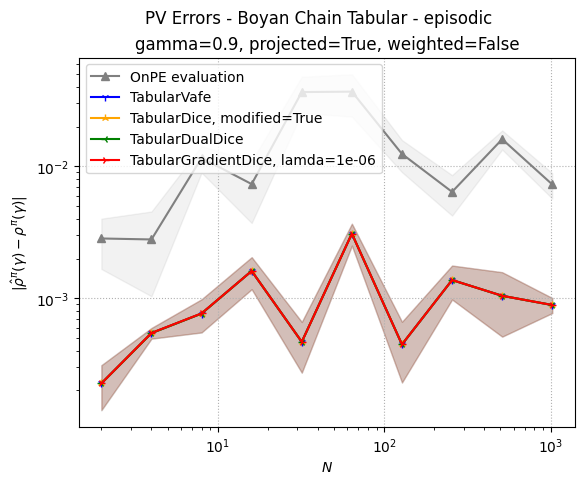

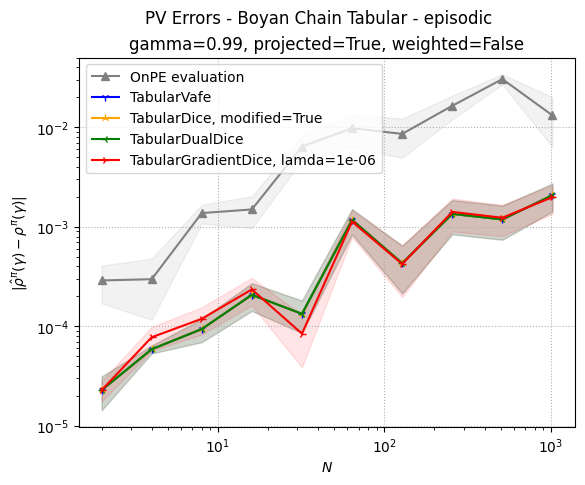

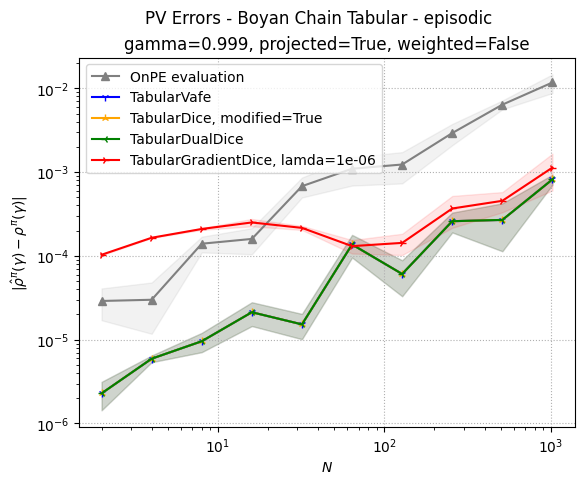

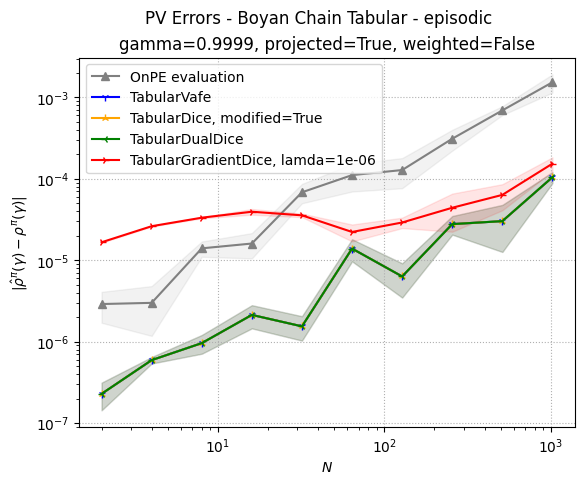

In [61]:
plot_episodic("pv", errors=True, weighted=False)

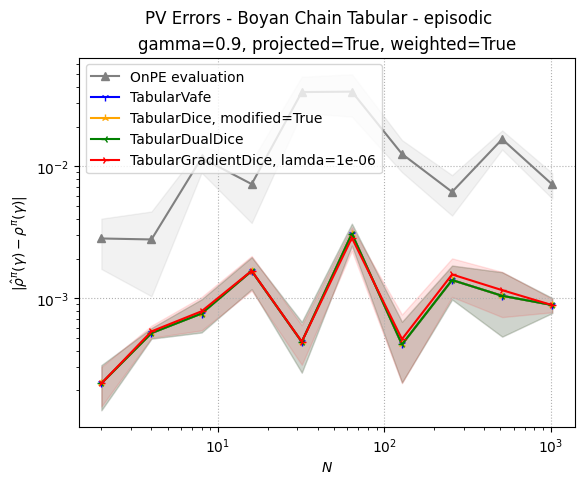

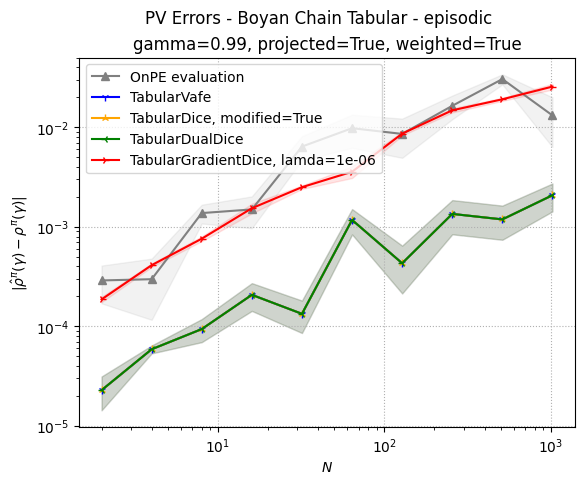

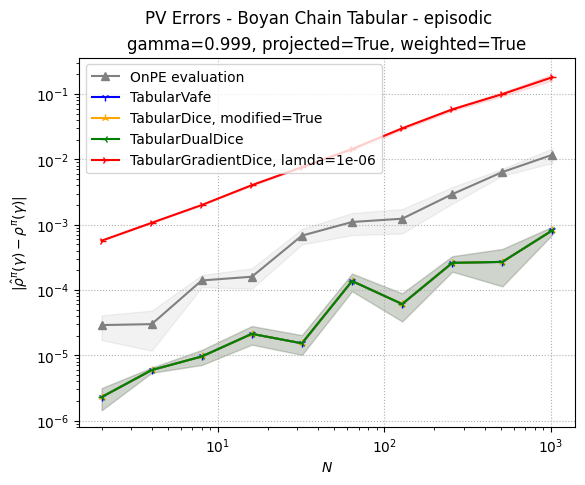

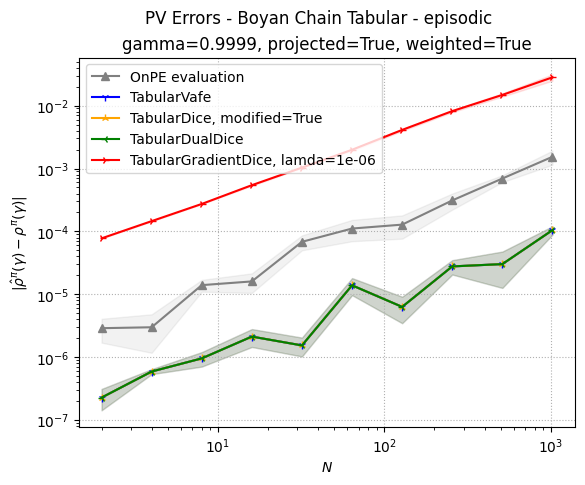

In [62]:
plot_episodic("pv", errors=True, weighted=True)

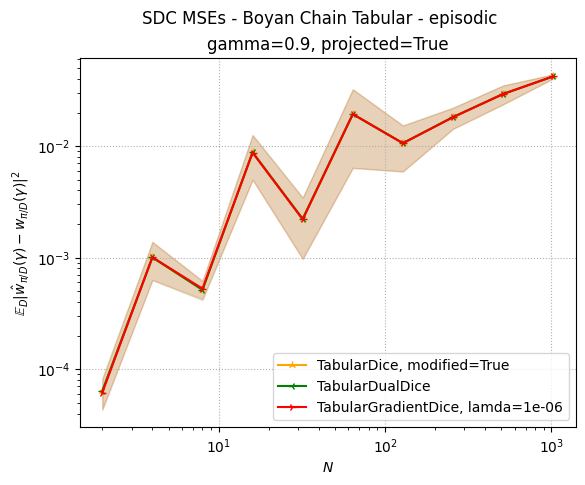

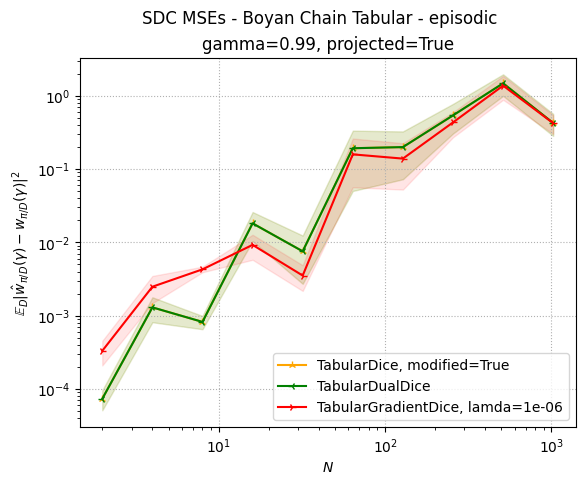

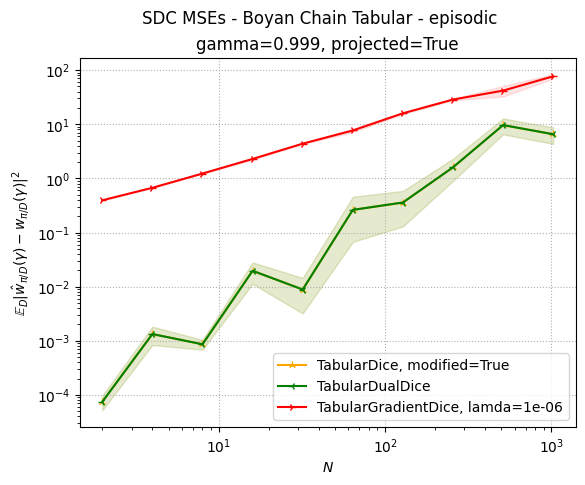

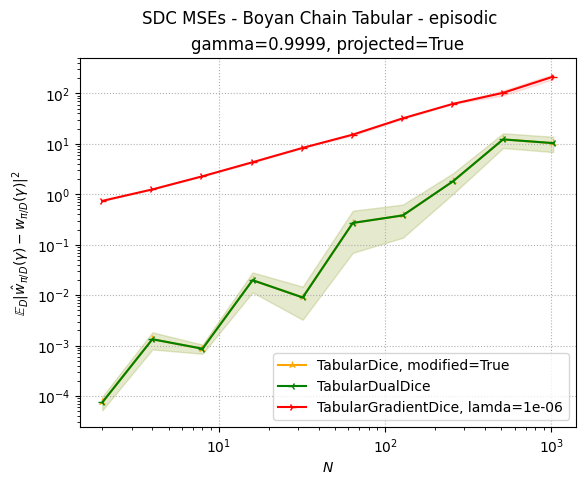

In [63]:
plot_episodic("sdc")

# Continuing

In [ ]:
kind = "continuing"

## `get_pvs` & `get_sdcs`

In [35]:
pv_OnPE = { seed: { N: {} for N in Ns } for seed in seeds }

pv_s_DICE = { seed: { N: {} for N in Ns } for seed in seeds }
pv_w_DICE = { seed: { N: {} for N in Ns } for seed in seeds }

sdc_DICE = { seed: { N: {} for N in Ns } for seed in seeds }

for seed in iterate_print(seeds, "seed"):
    for N in iterate_print(Ns, "N"):

        pv_OnPE[seed][N][kind] = get_pv_s_OnPE(
            estimator_s=estimators_OnPE[seed][N][kind],
            gamma_s=[1],
            verbosity=0,
        )

        pv_s_DICE[seed][N][kind] = get_pv_s_OffPE(
            estimator_s=estimators_DICE[seed][N][kind][0],
            gamma_s=[1],
            projected=projected,
            weighted=False,
            modified=modified,
            lamda=lamda,
            verbosity=0,
        )

        pv_w_DICE[seed][N][kind] = get_pv_s_OffPE(
            estimator_s=estimators_DICE[seed][N][kind][0],
            gamma_s=[1],
            projected=projected,
            weighted=True,
            modified=modified,
            lamda=lamda,
            verbosity=0,
        )

        sdc_DICE[seed][N][kind] = get_sdc_s(
            estimator_s=estimators_DICE[seed][N][kind][0],
            gamma_s=[1],
            projected=projected,
            modified=modified,
            lamda=lamda,
            verbosity=0,                
        )

        pv_OnPE  [seed][N][kind] = float(pv_OnPE  [seed][N][kind])
        pv_s_DICE[seed][N][kind] = float(pv_s_DICE[seed][N][kind])
        pv_w_DICE[seed][N][kind] = float(pv_w_DICE[seed][N][kind])

pv_DICE = { False: pv_s_DICE, True: pv_w_DICE, }

seed=0
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256


/var/folders/yz/1t3lyybx1q37vl97pt9jwt7r0000gn/T/ipykernel_84073/3154079293.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pv_OnPE  [seed][N][kind] = float(pv_OnPE  [seed][N][kind])


N=512
N=1024
seed=1
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024
seed=2
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024
seed=3
N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024


In [24]:
pv_ANAL  = { N: {} for N in Ns }
sdc_ANAL = { N: {} for N in Ns }

for N in iterate_print(Ns, "N"):
    analytical_solver = AnalyticalSolverBoyanChain(N, p, kind)

    pv, sdc, _ = analytical_solver.solve(
        gamma=1, projected=projected, primal_dual="dual" ) # type: ignore
    
    pv_ANAL [N][kind] = pv
    sdc_ANAL[N][kind] = sdc

N=2
N=4
N=8
N=16
N=32
N=64
N=128
N=256
N=512
N=1024


## Plot

In [ ]:
def plot_continuing(pv_sdc, weighted=None, errors=None):
    if pv_sdc == "pv":
        assert errors is not None
        assert weighted is not None

    gamma = 1

    plt.figure()

    x = Ns

    label_DICE = "TabularDice";     color_DICE = "orange"; marker_DICE = "1"
    label_OnPE = "OnPE evaluation"; color_OnPE = "grey";   marker_OnPE = "^"
    label_ANAL = "analytical";      color_ANAL = "black";  marker_ANAL = "."

    if pv_sdc == "pv":

        if errors:
            labels  = [ label_OnPE, label_DICE,  ]
            colors  = [ color_OnPE, color_DICE,  ]
            markers = [ marker_OnPE, marker_DICE, ]
        else:
            labels  = [ label_OnPE, label_DICE,  ] + [label_ANAL ]
            colors  = [ color_OnPE, color_DICE,  ] + [color_ANAL ]
            markers = [ marker_OnPE, marker_DICE, ] + [marker_ANAL]

    if pv_sdc == "sdc":
        labels  = [label_DICE ]
        colors  = [color_DICE ]
        markers = [marker_DICE]

    Z = labels, colors, markers
    for z in safe_zip(*Z):
        label, color, marker = z

        if pv_sdc == "pv":

            def a(seed, N):
                if label == "OnPE evaluation":
                    return pv_OnPE[seed][N][kind]
                elif label == "analytical":
                    return pv_ANAL[N][kind]
                else:
                    return pv_DICE[weighted][seed][N][kind] # type: ignore

            b = lambda N: pv_ANAL[N][kind]

            if errors:
                ys = np.array([
                    [ np.abs( a(seed, N) - b(N) ) for N in Ns ]
                        for seed in seeds
                ])

            else:
                ys = np.array([
                    [ a(seed, N) for N in Ns ]
                        for seed in seeds
                ])

        if pv_sdc == "sdc":
            a = lambda seed, N: sdc_DICE[seed][N][kind]
            b = lambda N: sdc_ANAL[N][kind]

            ys = np.array([
                [ np.mean( ( a(seed, N) - b(N) ) ** 2 ) for N in Ns ]
                    for seed in seeds
            ])

        y_mean = np.mean(ys, axis=0)
        y_std = np.std(ys, axis=0)

        y_down = y_mean - y_std * std_girth
        y_up   = y_mean + y_std * std_girth

        l = label
        if l == "TabularDice":         l += f", {modified=}"
        if l == "TabularGradientDice": l += f", {lamda=}"

        plt.plot(x, y_mean, color=color, marker=marker, label=l)
        plt.fill_between(x, y_down, y_up, color=color, alpha=alpha)

    if pv_sdc == "pv":  do_yscale = errors
    if pv_sdc == "sdc": do_yscale = True

    plt.xscale("log")
    if do_yscale: plt.yscale("log")


    if pv_sdc == "pv":
        y = r"\hat{\rho}^\pi(\gamma)"
        z = r"\rho^\pi(\gamma)"
        if errors:
            ylabel = f"$ | {y} - {z} | $"
        else:
            ylabel = f"$ {z} $"

    if pv_sdc == "sdc":
        x = r"\mathbb{E}_D"
        y = r"\hat{w}_{\pi / D}(\gamma)"
        z = r"w_{\pi / D}(\gamma)"
        ylabel = f"$ {x} | {y} - {z} |^2 $"

    plt.xlabel("$N$")
    plt.ylabel(ylabel)

    if pv_sdc == "pv":
        if errors:
            measure = "PV Errors"
        else:
            measure = "PVs"

    if pv_sdc == "sdc":
        measure = "SDC MSEs"

    suptitle = f"Boyan Chain Tabular - {kind} - {measure}"
    plt.suptitle(suptitle)

    if pv_sdc == "pv":  title = f"gamma={gamma}, {projected=}, {weighted=}"
    if pv_sdc == "sdc": title = f"gamma={gamma}, {projected=}"
    plt.title(title)

    plt.grid(linestyle=":")
    plt.legend()

    file_name = f"{suptitle}; {title}.png"
    path = os.path.join(dir_images["tabular"], file_name)
    plt.savefig(path)

    plt.show()

In [ ]:
for weighted in [False, True]:
    plot_continuing("pv", weighted, errors=False)

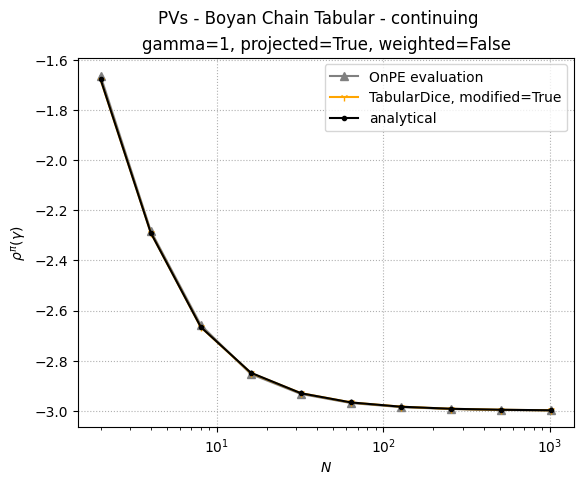

In [ ]:
plot_continuing("pv", errors=False, weighted=False)

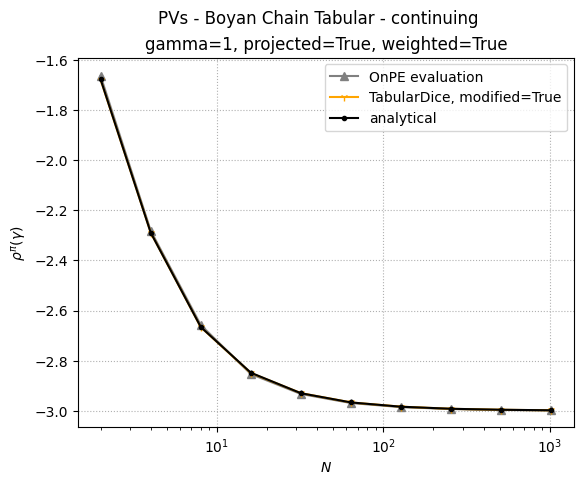

In [ ]:
plot_continuing("pv", errors=False, weighted=True)

In [ ]:
for weighted in [False, True]:
    plot_continuing("pv", weighted, errors=True)

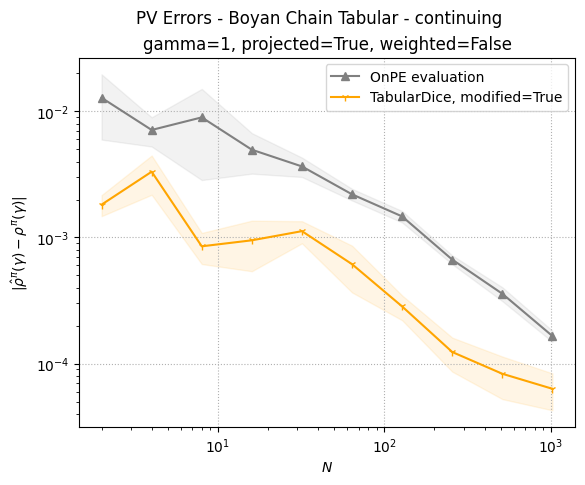

In [ ]:
plot_continuing("pv", errors=True, weighted=False)

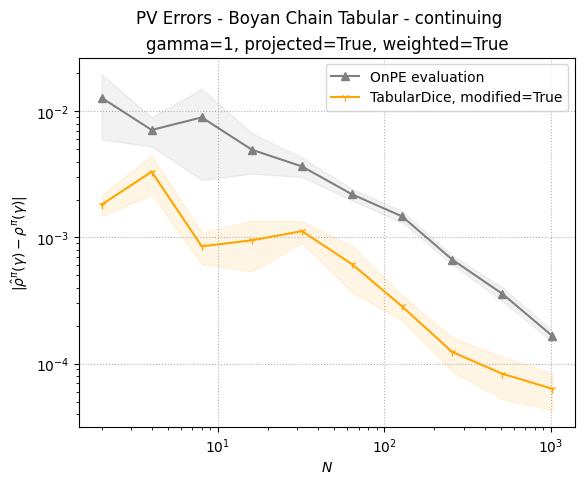

In [ ]:
plot_continuing("pv", errors=True, weighted=True)

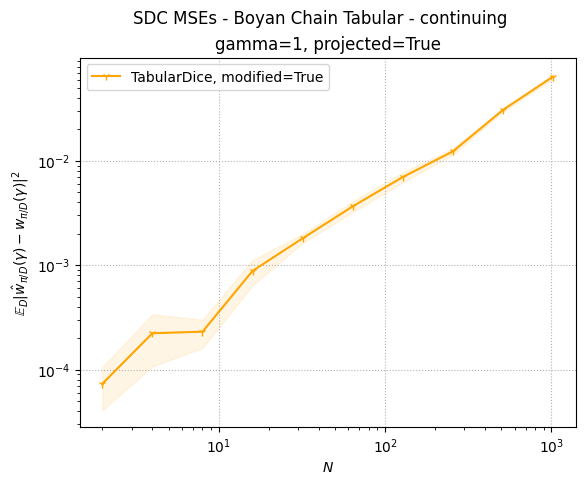

In [ ]:
plot_continuing("sdc")